In [1]:
import sys
import os

# add parent directory to path
library_path = os.path.abspath('..')
if library_path not in sys.path:
    sys.path.append(library_path)

from luxgiant_dstream.manhattan_type import process_manhattan_data, draw_manhattan

In [2]:
import pandas as pd

path_2_dir = '/mnt/0A2AAC152AABFBB7/data/gwasResult/'
filename1 = 'annotated_normalized_combined_R2_0.3.dose_step2_sex_pheno-glm.PHENO1.glm.logistic.hybrid'

df_gwas = pd.read_csv(
    os.path.join(path_2_dir, filename1), sep='\t', usecols=['#CHROM', 'POS', 'ID', 'P']
)
df_gwas

,#CHROM,POS,ID,P
0,1,727242,rs61769339,0.355696
1,1,727717,rs61769340,0.517232
2,1,730869,rs200188737,0.510707
3,1,732369,rs1315713498,0.741994
4,1,740738,rs146067153,0.816063
...,...,...,...,...
8414141,22,50790460,rs201882178,0.424731
8414142,22,50790482,rs80012748,0.202881
8414143,22,50791377,rs9616985,0.766148
8414144,22,50795915,rs374867791,0.216359


/mnt/0A2AAC152AABFBB7/CGE/luxgiant-dstream/luxgiant_dstream/manhattan_type.py:156: UserWarning: 
The palette list has fewer values (2) than needed (22) and will cycle, which may produce an uninterpretable plot.
  ax = sns.scatterplot(


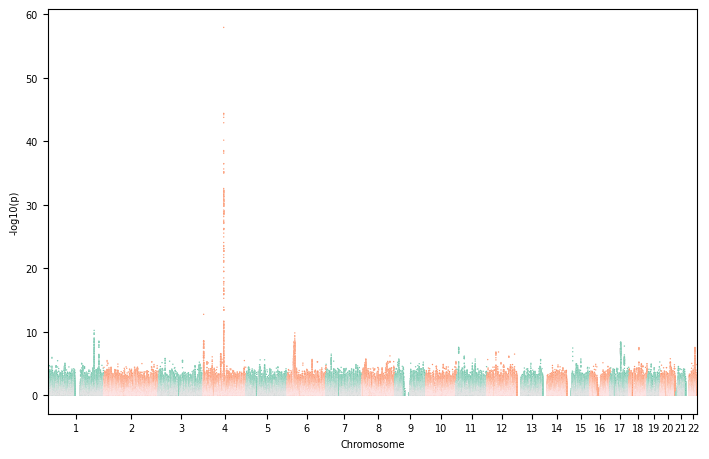

In [3]:
draw_manhattan(
    data_df=df_gwas,
    chr_col='#CHROM',
    pos_col='POS',
    p_col='P'
)